In [1410]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1411]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1412]:
#データフレームへの読み込み
df = pd.read_csv('/Users/rukasumichika/最終課題/data/LengthOfStay.csv')

In [1445]:
from ydata_profiling import ProfileReport

In [1414]:
# データの最初の5行を表示
print(df.head())

   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [1415]:
# データの統計情報を確認
df.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [1416]:
# データの情報を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [1417]:
# 'eid', 'vdate', 'discharged'を除外する
df_filtered = df.drop(columns=['eid', 'vdate', 'discharged'])
print(df_filtered.columns)

Index(['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facid',
       'lengthofstay'],
      dtype='object')


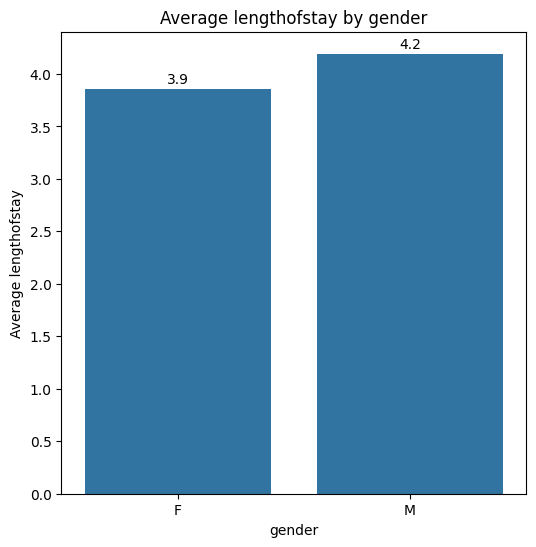

In [1418]:
# gender ごとの lengthofstay の平均を計算
gender_distinction = df.groupby('gender')['lengthofstay'].mean().reset_index()

# グラフの描画
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='gender', y='lengthofstay', data=gender_distinction, ax=ax)
ax.set_title('Average lengthofstay by gender')
ax.set_xlabel('gender')
ax.set_ylabel('Average lengthofstay')

# 各バーの上に数値ラベルを追加
for index, row in gender_distinction.iterrows():
    ax.text(index, row['lengthofstay'] + 0.05, round(row['lengthofstay'], 1), ha="center")

# グラフを表示
plt.show()

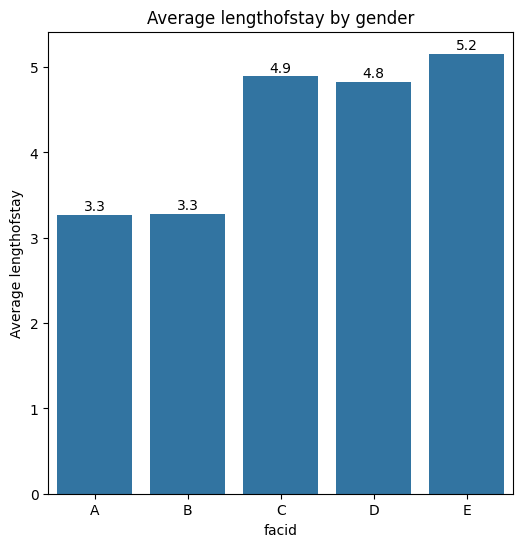

In [1419]:
# facid ごとの lengthofstay の平均を計算
facid_distinction = df.groupby('facid')['lengthofstay'].mean().reset_index()

# グラフの描画
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='facid', y='lengthofstay', data=facid_distinction, ax=ax)
ax.set_title('Average lengthofstay by gender')
ax.set_xlabel('facid')
ax.set_ylabel('Average lengthofstay')

# 各バーの上に数値ラベルを追加
for index, row in facid_distinction.iterrows():
    ax.text(index, row['lengthofstay'] + 0.05, round(row['lengthofstay'], 1), ha="center")

# グラフを表示
plt.show()

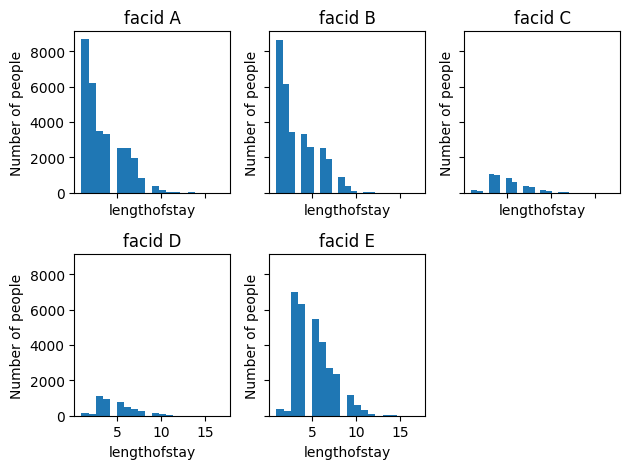

In [1420]:
# 2行3列のプロット領域を作成（x軸とy軸の値を揃える）
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

# facidごとのヒストグラムを作成
facilities = ['A', 'B', 'C', 'D', 'E']

for i, facid in enumerate(facilities):
    row, col = divmod(i, 3)  # facidごとにサブプロットの位置を決定
    axs[row, col].hist(df[df['facid'] == facid]['lengthofstay'], bins=20) # lengthofstayの最大値17を参考
    axs[row, col].set_title(f'facid {facid}')
    axs[row, col].set_xlabel('lengthofstay')
    axs[row, col].set_ylabel('Number of people')

# 不要なプロットを削除する
fig.delaxes(axs[1, 2])

# レイアウト調整して表示
plt.tight_layout()
plt.show()

In [1422]:
# 'rcount' 列で '5+' を 5 に変換
df['rcount'] = df['rcount'].replace('5+', 5)

# object型をint型に変換
df['rcount'] = df['rcount'].astype(int)

# rcount列に含まれる値とタイプ型を確認
print(df['rcount'].unique())
print(df['rcount'].dtype)

[0 5 1 3 4 2]
int64


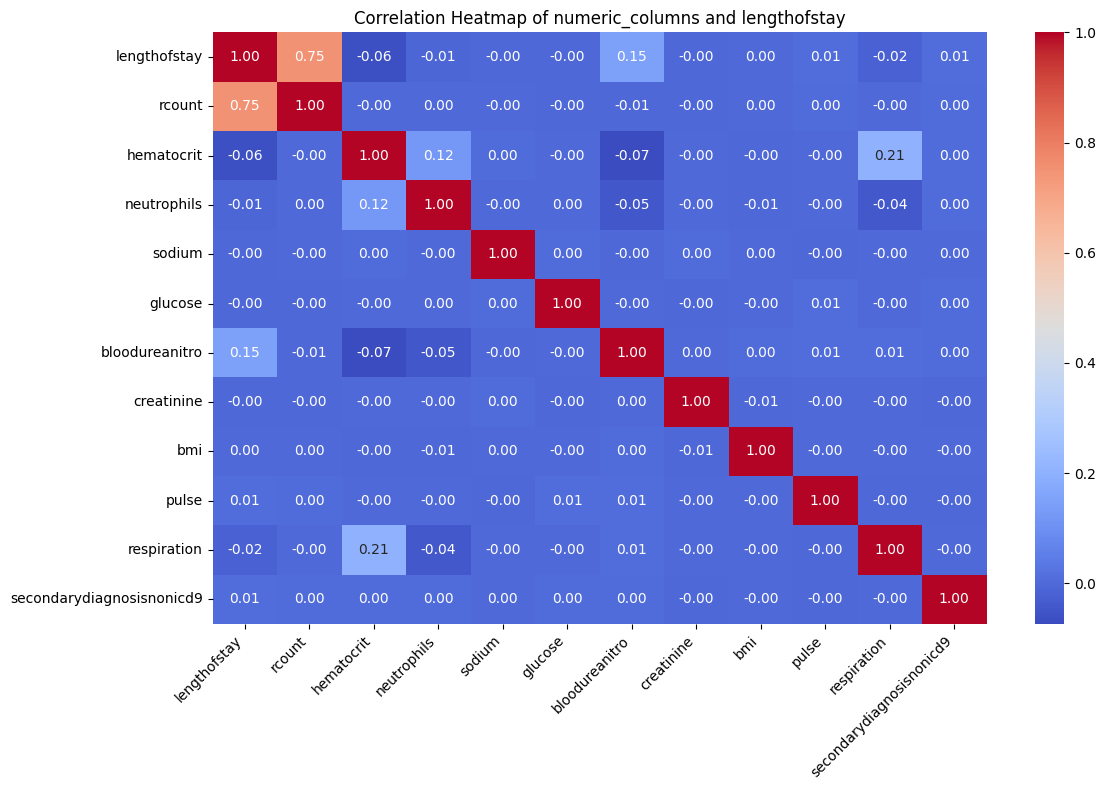

In [1423]:
# 数字列を抜き出す
numeric_columns = df[['lengthofstay', 'rcount', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9']]

# 相関行列を作成
corr_matrix = numeric_columns.corr()

# ヒートマップ作成
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of numeric_columns and lengthofstay')
plt.xticks(rotation=45, ha='right')  # x軸ラベルを45度回転して見やすくする

# レイアウト調整して表示
plt.tight_layout()
plt.show()

In [1424]:
# genderに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df['gender'], prefix='gender')

# int型に変換
encoded = encoded.astype(int)

# 元のデータフレームに結合
df = pd.concat([df, encoded], axis=1)

# 'gender' 列を削除
df.drop('gender', axis=1, inplace=True)

# 結果を確認
df.head()

,eid,vdate,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,gender_F,gender_M
0,1,8/29/2012,0,0,0,0,0,0,0,0,...,1.390722,30.432418,96,6.5,4,9/1/2012,B,3,1,0
1,2,5/26/2012,5,0,0,0,0,0,0,0,...,0.943164,28.460516,61,6.5,1,6/2/2012,A,7,1,0
2,3,9/22/2012,1,0,0,0,0,0,0,0,...,1.065750,28.843812,64,6.5,2,9/25/2012,B,3,1,0
3,4,8/9/2012,0,0,0,0,0,0,0,0,...,0.906862,27.959007,76,6.5,1,8/10/2012,A,1,1,0
4,5,12/20/2012,0,0,0,0,1,0,1,0,...,1.242854,30.258927,67,5.6,2,12/24/2012,E,4,1,0


In [1425]:
# facidに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df['facid'], prefix='facid')

# bool型をint型に変換
encoded = encoded.astype(int)

# 元のデータフレームに結合
df = pd.concat([df, encoded], axis=1)

# 'facid' 列を削除
df.drop('facid', axis=1, inplace=True)

# 結果を確認
df.head()

,eid,vdate,rcount,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,...,secondarydiagnosisnonicd9,discharged,lengthofstay,gender_F,gender_M,facid_A,facid_B,facid_C,facid_D,facid_E
0,1,8/29/2012,0,0,0,0,0,0,0,0,...,4,9/1/2012,3,1,0,0,1,0,0,0
1,2,5/26/2012,5,0,0,0,0,0,0,0,...,1,6/2/2012,7,1,0,1,0,0,0,0
2,3,9/22/2012,1,0,0,0,0,0,0,0,...,2,9/25/2012,3,1,0,0,1,0,0,0
3,4,8/9/2012,0,0,0,0,0,0,0,0,...,1,8/10/2012,1,1,0,1,0,0,0,0
4,5,12/20/2012,0,0,0,0,1,0,1,0,...,2,12/24/2012,4,1,0,0,0,0,0,1


In [1426]:
from sklearn.model_selection import train_test_split

In [1427]:
# 学習データとテストデータに分割
X = df_filtered.drop(columns=['lengthofstay']).to_numpy()
y = df_filtered['lengthofstay'].to_numpy()

In [1428]:
# 比率7:3で学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 24) (30000, 24) (70000,) (30000,)


In [1429]:
# StandardScalerクラスのインスタンス化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1430]:
# 標準化したいインデックスを確認
print(X_train.shape)
print(df_filtered.drop(columns=['lengthofstay']).columns)

(70000, 24)
Index(['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facid'],
      dtype='object')


In [1431]:
# 標準化したい特徴量を抽出（22列目までを選択）
columns_to_scale = list(range(0, 22))

In [1432]:
# X_trainから指定したを特徴量抽出
X_train_selected = X_train[:, columns_to_scale]

In [1433]:
# StandardScalerを使って標準化
X_train_scaler = scaler.fit_transform(X_train_selected)

ValueError: could not convert string to float: '5+'

In [ ]:
# 標準化した部分を代入
X_train_scaled = np.copy(X_train)  # 元のデータのコピーを作成
X_train_scaled[:, columns_to_scale] = X_train_scaler

# 結果を表示（形状を確認）
print(X_train_scaled.shape)

NameError: name 'X_train_scaler' is not defined

In [ ]:
# 変換前(X_train)の状態
df_X_train = pd.DataFrame(X_train, columns=['rcount','dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_train.head()

In [ ]:
# 変換後(X_train_scaled)の状態
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_train_scaled.head()

In [ ]:
df_X_train_scaled.describe()

In [ ]:
# X_testも同様に標準化
X_test_selected = X_test[:, columns_to_scale]
X_test_scaler = scaler.fit_transform(X_test_selected)

: 

In [ ]:
# 標準化した部分を代入
X_test_scaled = np.copy(X_test)  # 元のデータのコピーを作成
X_test_scaled[:, columns_to_scale] = X_test_scaler

# 結果を表示（形状を確認）
print(X_test_scaled.shape)

In [ ]:
# 変換前(X_test)の状態
df_X_test = pd.DataFrame(X_test, columns=['rcount','dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_test.head()

In [ ]:
# 変換後(X_test_scaled)の状態
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'gender_F', 'gender_M', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_test_scaled.head()

In [ ]:
df_X_test_scaled.describe()

In [ ]:
# 重回帰で分析
from sklearn.linear_model import LinearRegression
model = LinearRegression()

: 

In [ ]:
# 予測モデルの学習
model.fit(X_train_scaled, y_train)

In [ ]:
# 学習データを用いて決定係数を算出
model.score(X_train_scaled, y_train)

In [ ]:
# テストデータを用いて決定係数を算出
model.score(X_test_scaled, y_test)

In [ ]:
# テストデータに対する予測
y_pred = model.predict(X_test_scaled)

: 

In [ ]:
# 二乗平均平方根誤差（RMSE）の値を算出
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
# 平均絶対誤差(MAPE) の値を算出
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [ ]:
# 計算式の確認
print("係数:", model.coef_)
print("切片:", model.intercept_)

In [ ]:
# 各要素が入院期間に与える影響度合い
sns.barplot(x = ['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9','gender_F', 'gender_M', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'], y=model.coef_)

# グラフの設定
plt.title('Correlation between Length of Stay and Selected Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Length of Stay', fontsize=12)
plt.xticks(rotation=45, ha='right')  # x軸ラベルを45度回転して見やすくする
plt.tight_layout()  # レイアウトを自動調整
plt.show()

In [ ]:
# DataFrame に変換
df = pd.DataFrame({
    'Actual': y_test,     # 実際の値
    'Predicted': y_pred   # 予測された値
})

# DataFrame を表示
df